In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
import statsmodels.api as sm

from warnings import filterwarnings
filterwarnings('ignore')

Primero el NO2.

In [2]:
pollutant = 'NO2'
lockdown = dt.datetime(2020,3,14)

In [3]:
df2019 = pd.read_csv('../clean_datasets/%s-2019.csv'%(pollutant), index_col=0, parse_dates=True)
df2020 = pd.read_csv('../clean_datasets/%s-2020.csv'%(pollutant), index_col=0, parse_dates=True)

In [4]:
#To avoid date issues, I'll change the year of df2019 to 2020
df2019['old_id'] = df2019.index
df2019['new_id'] = df2019['old_id'].apply(lambda x:dt.datetime(2020, x.month, x.day, x.hour))
df2019.set_index('new_id', inplace=True)
df2019.drop(columns=['old_id'],inplace=True)
df2019.index.rename('dt', inplace=True)

I'll be working with the average concentration throughout all stations per hour.

In [5]:
df2019 = df2019.groupby('dt')['concentracion'].mean()
df2019 = pd.DataFrame(df2019)

In [6]:
df2020 = df2020.groupby('dt')['concentracion'].mean()
df2020 = pd.DataFrame(df2020)

In [7]:
start = dt.datetime(2020,1,1)
end = dt.datetime(2020,5,1)
tick_pos = pd.date_range(start=start, end=end, freq='15D')

In [8]:
months = tick_pos.month.astype(int)
days = tick_pos.day.astype(str)

In [9]:
month_map = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr'}
month_names = np.array([month_map[month] for month in months])
month_names = pd.Index(month_names)

In [10]:
tick_labels = month_names + '-' + days

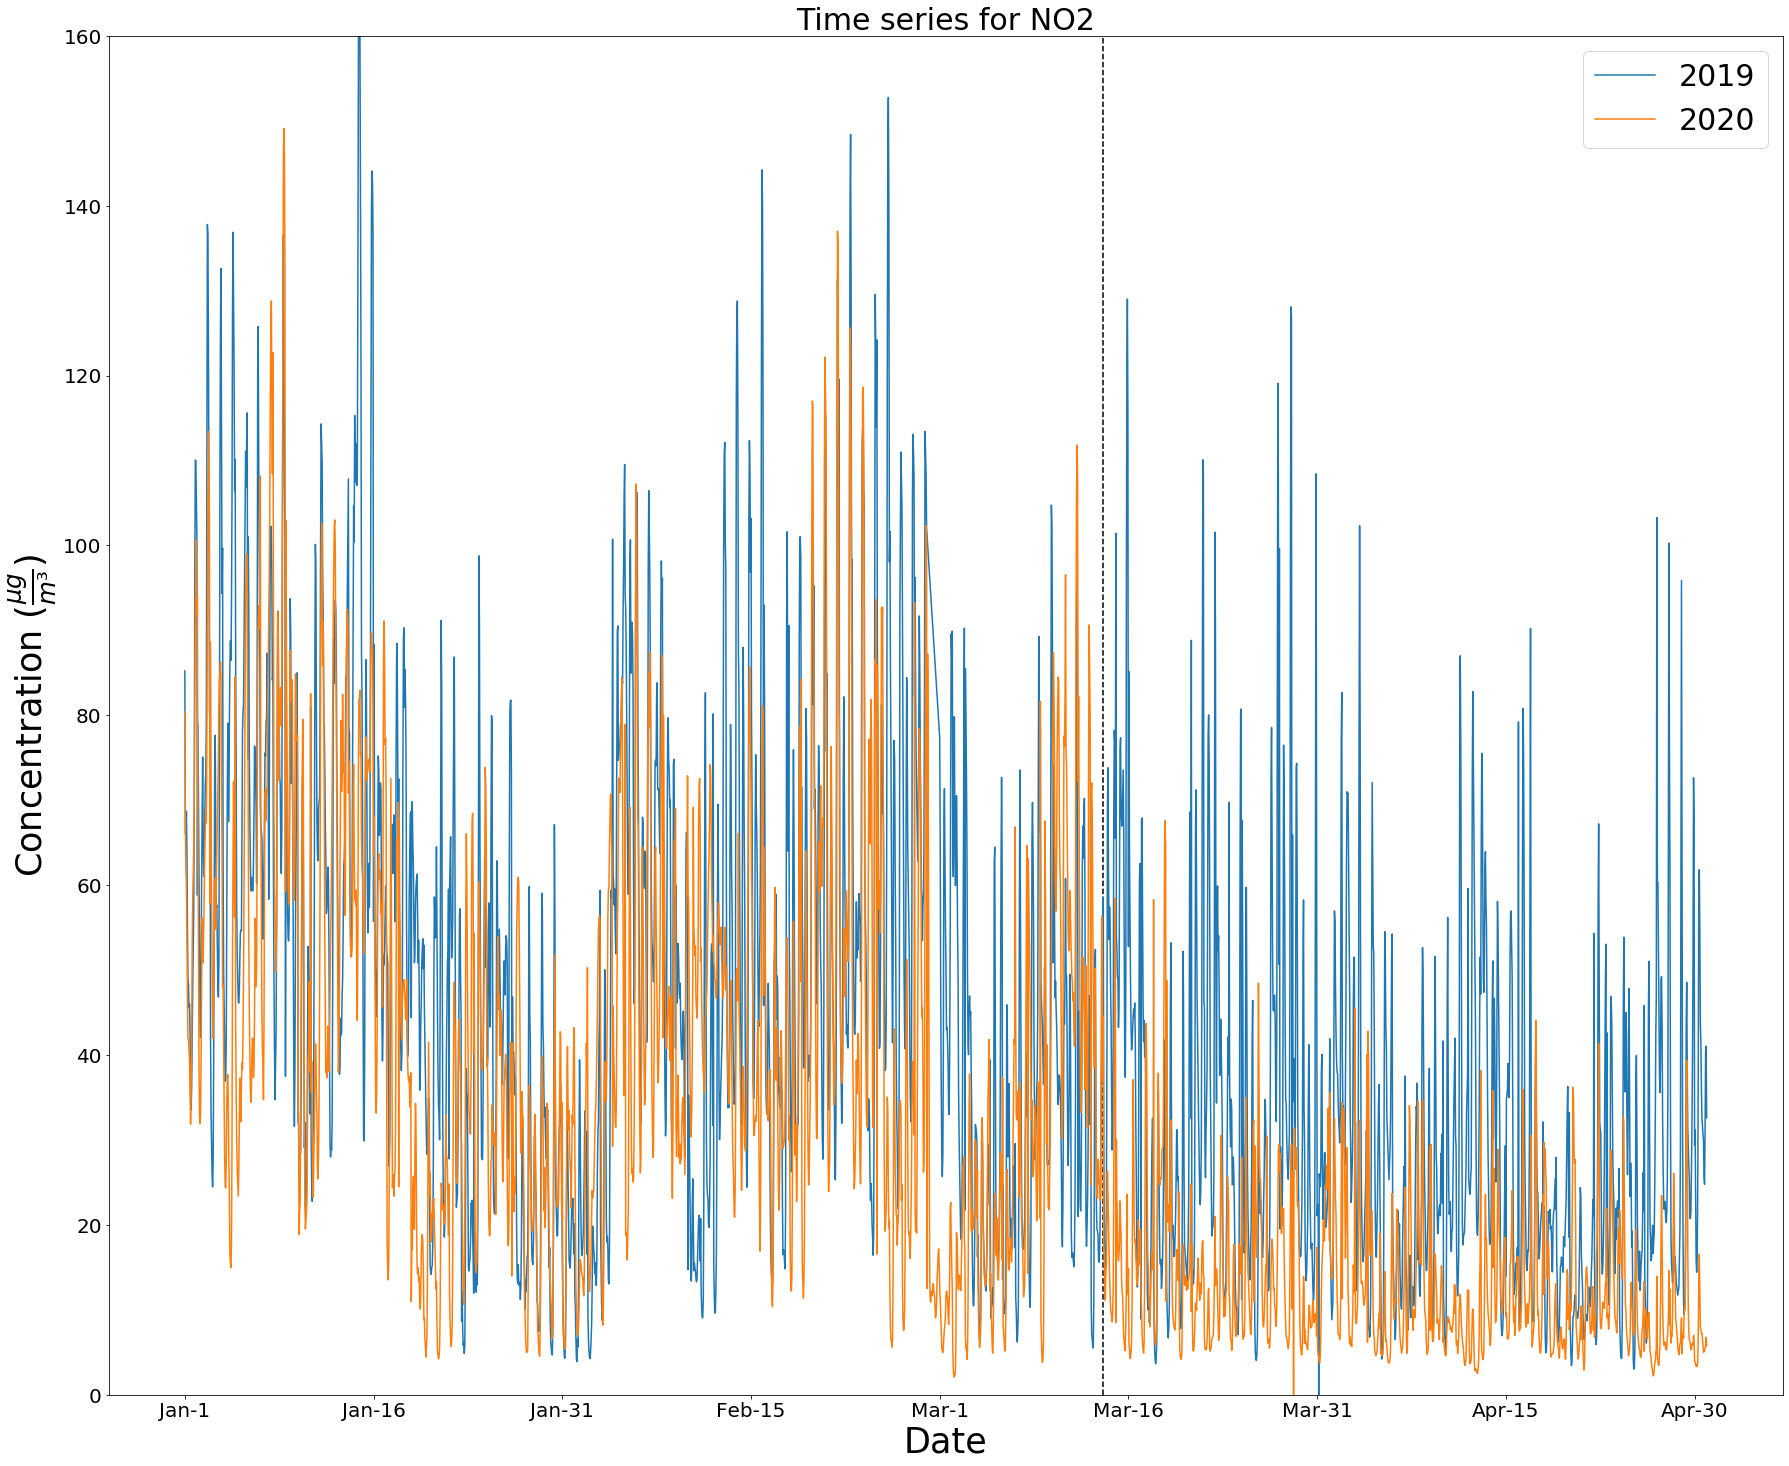

In [11]:
plt.figure(figsize=(30,25))
plt.plot(df2019.index, df2019['concentracion'], label = 2019)
plt.plot(df2020.index, df2020['concentracion'], label = 2020)
plt.xlabel('Date', fontsize=35)
plt.ylabel(r'Concentration $(\frac{\mu g}{m³})$', fontsize=35)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Time series for ' + pollutant, fontsize=30)
plt.legend(fontsize=30)
plt.ylim(0,160)
plt.xticks(tick_pos, tick_labels)
plt.vlines(lockdown, ymin = 0, ymax = 160, linestyle='--');

Ahora el O3.

In [12]:
pollutant = 'O3'

In [13]:
df2019 = pd.read_csv('../clean_datasets/%s-2019.csv'%(pollutant), index_col=0, parse_dates=True)
df2020 = pd.read_csv('../clean_datasets/%s-2020.csv'%(pollutant), index_col=0, parse_dates=True)

In [14]:
#To avoid date issues, I'll change the year of df2019 to 2020
df2019['old_id'] = df2019.index
df2019['new_id'] = df2019['old_id'].apply(lambda x:dt.datetime(2020, x.month, x.day, x.hour))
df2019.set_index('new_id', inplace=True)
df2019.drop(columns=['old_id'],inplace=True)
df2019.index.rename('dt', inplace=True)

I'll be working with the average concentration throughout all stations per hour.

In [15]:
df2019 = df2019.groupby('dt')['concentracion'].mean()
df2019 = pd.DataFrame(df2019)

In [16]:
df2020 = df2020.groupby('dt')['concentracion'].mean()
df2020 = pd.DataFrame(df2020)

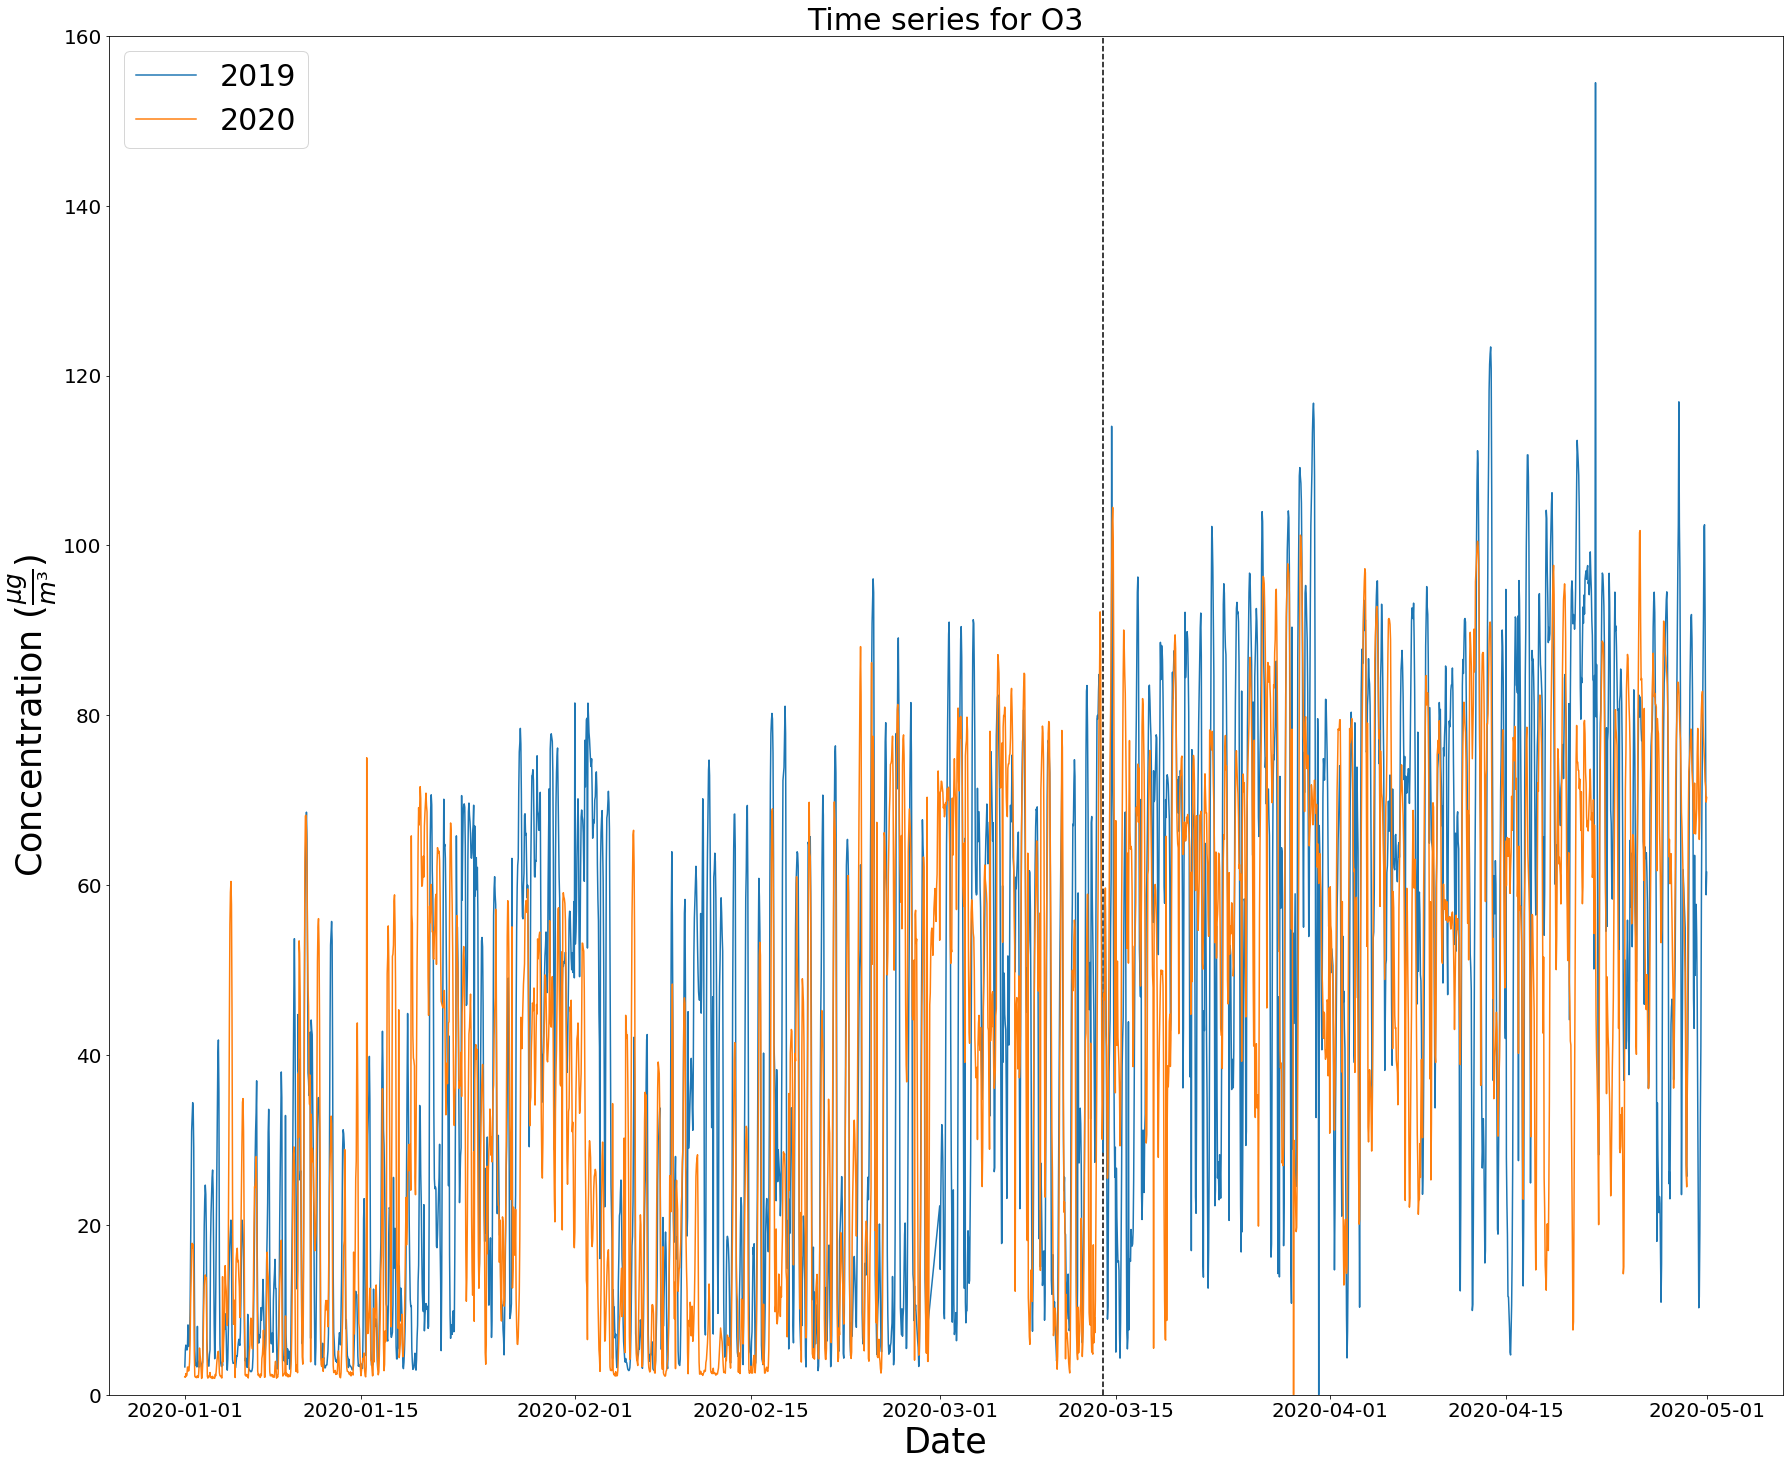

In [17]:
plt.figure(figsize=(30,25))
plt.plot(df2019.index, df2019['concentracion'], label = 2019)
plt.plot(df2020.index, df2020['concentracion'], label = 2020)
plt.xlabel('Date', fontsize=35)
plt.ylabel(r'Concentration $(\frac{\mu g}{m³})$', fontsize=35)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Time series for ' + pollutant, fontsize=30)
plt.legend(fontsize=30)
plt.ylim(0,160)
plt.vlines(lockdown, ymin = 0, ymax = 160, linestyle='--');